In [44]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [86]:
#inspiration taken from https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

faces = fetch_olivetti_faces()

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42, stratify=y)
categories = 40

In [72]:
kmeans = KMeans(n_clusters=categories, n_init=5, max_iter=10000, tol=1e-5)

history = kmeans.fit_predict(X_train)

In [73]:
predictions = kmeans.predict(X_test)

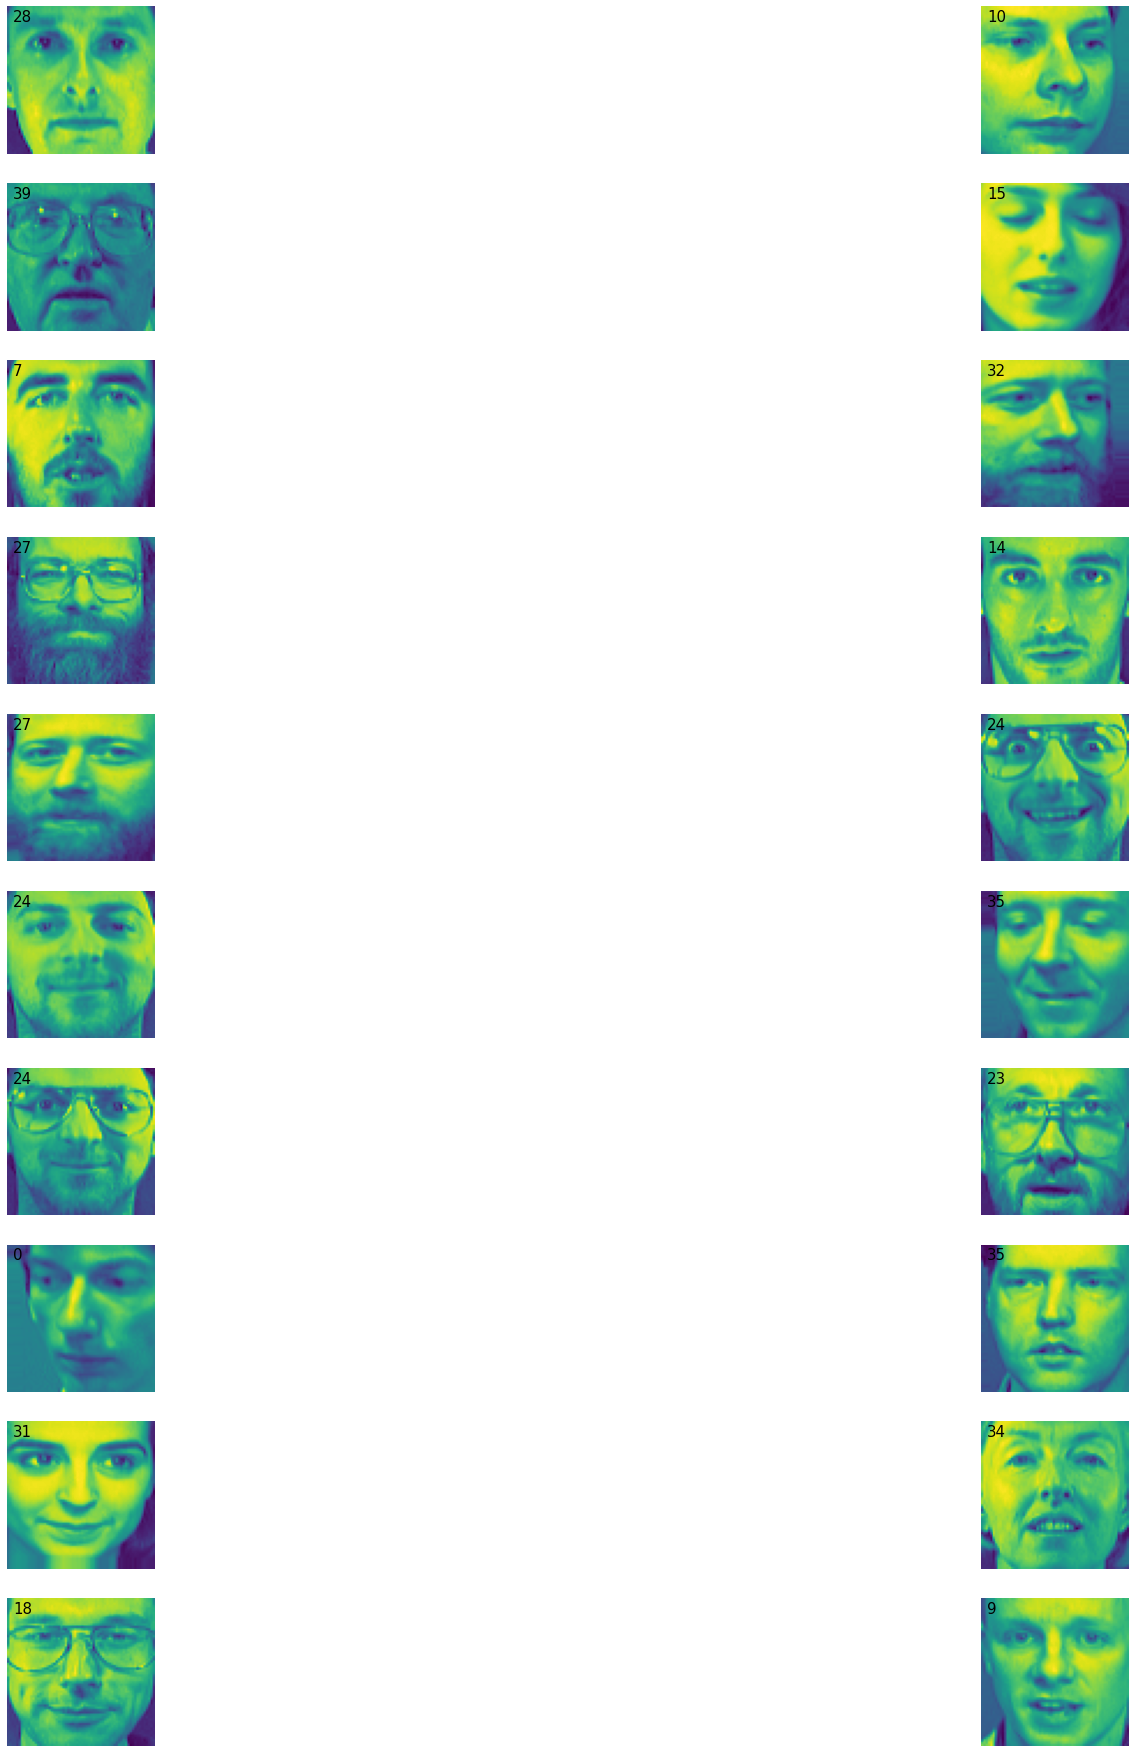

In [74]:
plt.figure(figsize=(32,32))
for i in range(10):
    ax = plt.subplot(10,2,i*2+1)
    img = X_train[i].reshape(64,64)
    ax.imshow(img)
    label = history[i]
    string = r'{}'.format(label)
    ax.text(2, 6, string , fontsize=15)
    ax.axis('off')

    ax1 = plt.subplot(10,2,i*2+2)
    img1 = X_test[i].reshape(64,64)
    ax1.imshow(img1)
    label1 = predictions[i]
    string1 = r'{}'.format(label1)
    ax1.text(2,6, string1, fontsize=15)
    ax1.axis('off')

plt.show()

5
228
6


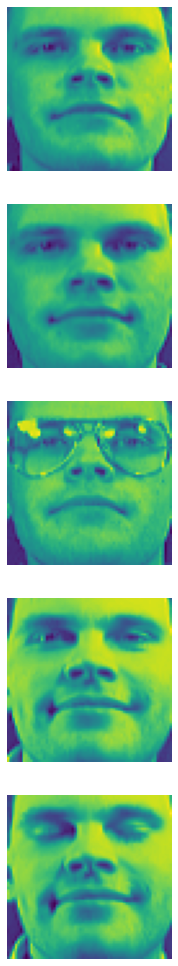

In [85]:
#plotting the groups
label = 6
indexes_of_label1 = np.where(history == label)
print(indexes_of_label1[0].size)
index_of =indexes_of_label1[0][1]
print(index_of)
print(history[index_of])

plt.figure(figsize=(32,32))
title_str = 'lable = {}'.format(label)
plt.title(title_str)
examples = 9
for cat in range(categories):
for i in range(min(examples, indexes_of_label1[0].size)):
    ax = plt.subplot(examples,1, i+1)
    ax.axis('off')
    index_of_picture_with_label = indexes_of_label1[0][i]
    ax.imshow(X_train[index_of_picture_with_label].reshape(64,64))
plt.show()